[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_5.ipynb)

Set 5
---



**Finding roots of polynomial by Secant method**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files

In [0]:
def secant(prev,cur,k):
  values = []
  values.append(prev)
  values.append(cur)
  func_prev = func(prev,k)
  func_cur = func(cur,k)
  val_diff = cur - prev
  func_diff = func_cur - func_prev
  nex = cur - (func_cur * val_diff / func_diff)
  table = pd.DataFrame(columns=['x(n)' , 'f(x(n))' ,  'x(n)-x(n-1)' , 'f(x(n))-f(x(n-1))' , 'x(n+1)' , 'x(n+1)-x(n)'])
  i = 0
  table.loc[i] = [prev,func_prev,'-','-','-','-']
  i = i+1
  table.loc[i] = [cur,func_cur,val_diff,func_diff,nex,nex - cur]
  prev = cur
  cur = nex
  values.append(cur)
  while(True):
    if(abs(cur - prev) == 0):
      break;
    func_prev = func(prev,k)
    func_cur = func(cur,k)
    val_diff = cur - prev
    func_diff = func_cur - func_prev
    nex = cur - (func_cur * val_diff / func_diff)
    i = i + 1
    table.loc[i] = cur,func_cur,val_diff,func_diff,nex,nex-cur
    prev = cur
    cur = nex
    values.append(cur)
  return table , nex , values

In [0]:
def graph(different,same,i):
  plt.plot(np.arange(len(different)),different,label='On different side')
  plt.plot(np.arange(len(same)),same,label='On same side')
  plt.legend()
  plt.xlabel('No. of iterations')
  plt.ylabel('Value of root')
  plt.grid(True)
  plt.savefig('Iterations' + str(i) + '.png')
#   files.download('Iterations' + str(i) + '.png')
  plt.show()

In [0]:
def func(x,k):
    if k==1:
        return x**6 - x - 1;
    elif k==2:
        return x**3 - x**2 - x - 1;
    elif k==3:
        return x - 1 - 0.3*math.cos(x);
    elif k==4:
        return 0.5 + math.sin(x) - math.cos(x);
    elif k==5:
        return x - math.e**(-x);
    elif k==6:
        return math.e**(-x) - math.sin(x);
    elif k==7:
        return x**3 - 2*x - 2;
    elif k==8:
        return x**4 - x - 1;
    elif k==9:
      return math.e**(x) - x - 2;
    elif k==10:
      return (1 - x + math.sin(x));
    elif k==11:
      return x - math.tan(x);
    elif k==12:
      return x - x**2;
    elif k==13:
      return x**2 - x;

In [174]:
table , root , different = secant(2,1,1)
print(round(root,5))
table

1.13472


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,61,-,-,-,-
1,1,-1,-1,-62,1.01613,0.016129
2,1.01613,-0.915368,0.016129,0.0846323,1.19058,0.174449
3,1.19058,0.657466,0.174449,1.57283,1.11766,-0.0729219
4,1.11766,-0.168491,-0.0729219,-0.825957,1.13253,0.0148757
5,1.13253,-0.0224373,0.0148757,0.146054,1.13482,0.00228526
6,1.13482,0.000953564,0.00228526,0.0233909,1.13472,-9.31621e-05
7,1.13472,-5.06617e-06,-9.31621e-05,-0.00095863,1.13472,4.92343e-07
8,1.13472,-1.13476e-09,4.92343e-07,5.06503e-06,1.13472,1.10304e-10
9,1.13472,1.55431e-15,1.10304e-10,1.13476e-09,1.13472,-2.22045e-16


1.13472


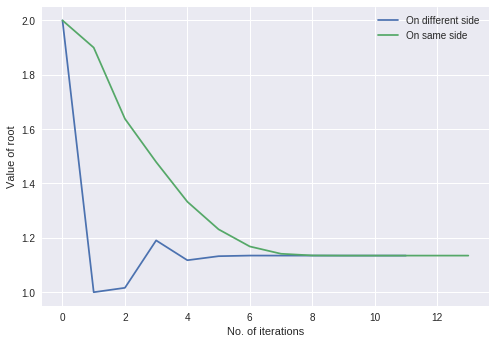

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,61,-,-,-,-
1,1.9,44.1459,-0.1,-16.8541,1.63807,-0.261929
2,1.63807,16.6814,-0.261929,-27.4645,1.47898,-0.159091
3,1.47898,7.98683,-0.159091,-8.6946,1.33284,-0.146141
4,1.33284,3.27332,-0.146141,-4.71351,1.23135,-0.101488
5,1.23135,1.25435,-0.101488,-2.01897,1.1683,-0.0630527
6,1.1683,0.374554,-0.0630527,-0.879795,1.14145,-0.0268434
7,1.14145,0.0703727,-0.0268434,-0.304182,1.13524,-0.00621025
8,1.13524,0.00535539,-0.00621025,-0.0650174,1.13473,-0.000511529
9,1.13473,8.62406e-05,-0.000511529,-0.00526915,1.13472,-8.37224e-06


In [175]:
table , root , same = secant(2,1.9,1)
print(round(root,5))
graph(different,same,1)
table

In [176]:
table , root , different = secant(-1,0,1)
print(round(root,5))
table

-0.77809


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,0,-1,1,-2,-0.5,-0.5
2,-0.5,-0.484375,-0.5,0.515625,-0.969697,-0.469697
3,-0.969697,0.801109,-0.469697,1.28548,-0.676984,0.292713
4,-0.676984,-0.226751,0.292713,-1.02786,-0.741558,-0.0645741
5,-0.741558,-0.092151,-0.0645741,0.1346,-0.785767,-0.0442092
6,-0.785767,0.0211428,-0.0442092,0.113294,-0.777517,0.00825029
7,-0.777517,-0.00155185,0.00825029,-0.0226947,-0.778081,-0.000564151
8,-0.778081,-2.41324e-05,-0.000564151,0.00152772,-0.77809,-8.91153e-06
9,-0.77809,2.80499e-08,-8.91153e-06,2.41605e-05,-0.77809,1.03461e-08


-0.77809


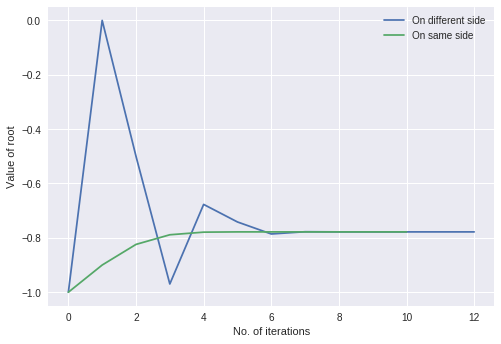

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,-0.9,0.431441,0.1,-0.568559,-0.824117,0.0758832
2,-0.824117,0.137397,0.0758832,-0.294044,-0.788659,0.0354576
3,-0.788659,0.0292817,0.0354576,-0.108115,-0.779056,0.00960327
4,-0.779056,0.00262502,0.00960327,-0.0266566,-0.77811,0.000945686
5,-0.77811,5.5946e-05,0.000945686,-0.00256908,-0.77809,2.05939e-05
6,-0.77809,1.09594e-07,2.05939e-05,-5.58364e-05,-0.77809,4.0421e-08
7,-0.77809,4.58589e-12,4.0421e-08,-1.09589e-07,-0.77809,1.69142e-12
8,-0.77809,2.22045e-16,1.69142e-12,-4.58567e-12,-0.77809,1.11022e-16
9,-0.77809,-1.11022e-16,1.11022e-16,-3.33067e-16,-0.77809,0


In [177]:
table , root , same = secant(-1,-0.9,1)
print(round(root,5))
graph(different,same,1)
table

In [178]:
table , root , different = secant(2,1,2)
print(round(root,5))
table

1.83929


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,1,-,-,-,-
1,1,-2,-1,-3,1.66667,0.666667
2,1.66667,-0.814815,0.666667,1.18519,2.125,0.458333
3,2.125,1.95508,0.458333,2.76989,1.80149,-0.323506
4,1.80149,-0.200342,-0.323506,-2.15542,1.83156,0.0300692
5,1.83156,-0.0419823,0.0300692,0.158359,1.83953,0.00797159
6,1.83953,0.00135629,0.00797159,0.0433386,1.83929,-0.000249473
7,1.83929,-8.68907e-06,-0.000249473,-0.00136498,1.83929,1.58807e-06
8,1.83929,-1.77859e-09,1.58807e-06,8.68729e-06,1.83929,3.25133e-10
9,1.83929,2.88658e-15,3.25133e-10,1.7786e-09,1.83929,-4.44089e-16


1.83929


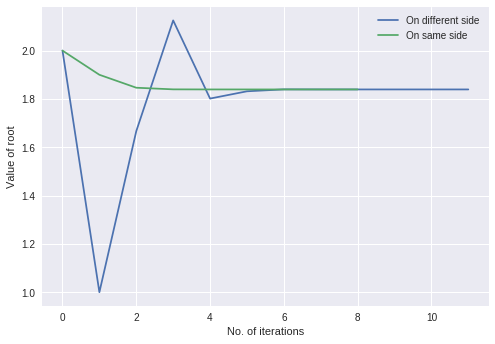

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,1,-,-,-,-
1,1.9,0.349,-0.1,-0.651,1.84639,-0.0536098
2,1.84639,0.0390865,-0.0536098,-0.309913,1.83963,-0.00676131
3,1.83963,0.00187196,-0.00676131,-0.0372146,1.83929,-0.000340106
4,1.83929,1.09297e-05,-0.000340106,-0.00186103,1.83929,-1.99742e-06
5,1.83929,3.08739e-09,-1.99742e-06,-1.09266e-05,1.83929,-5.64385e-10
6,1.83929,5.10703e-15,-5.64385e-10,-3.08738e-09,1.83929,-8.88178e-16
7,1.83929,2.22045e-16,-8.88178e-16,-4.88498e-15,1.83929,0


In [179]:
table , root , same = secant(2,1.9,2)
print(round(root,5))
graph(different,same,2)
table

In [180]:
table , root , different = secant(1,2,3)
print(round(root,5))
table

1.12843


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-1.620907e-01,-,-,-,-
1,2,1.124844e+00,1,1.28693,1.12595,-0.874049
2,1.12595,-3.144505e-03,-0.874049,-1.12799,1.12839,0.0024366
3,1.12839,-4.768953e-05,0.0024366,0.00309682,1.12843,3.75224e-05
4,1.12843,5.971701e-09,3.75224e-05,4.76955e-05,1.12843,-4.69799e-09
5,1.12843,-1.132427e-14,-4.69799e-09,-5.97171e-09,1.12843,8.88178e-15
6,1.12843,-2.775558e-17,8.88178e-15,1.12965e-14,1.12843,0


1.12843


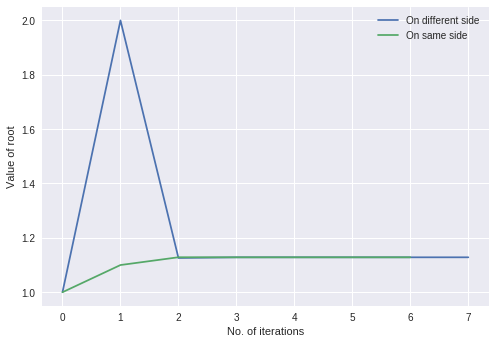

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-1.620907e-01,-,-,-,-
1,1.1,-3.607884e-02,0.1,0.126012,1.12863,0.0286313
2,1.12863,2.621211e-04,0.0286313,0.036341,1.12842,-0.000206513
3,1.12842,-3.843924e-07,-0.000206513,-0.000262505,1.12843,3.02401e-07
4,1.12843,-4.003686e-12,3.02401e-07,3.84388e-07,1.12843,3.1497e-12
5,1.12843,-2.775558e-17,3.1497e-12,4.00366e-12,1.12843,0


In [181]:
table , root , same = secant(1,1.1,3)
print(round(root,5))
graph(different,same,3)
table

In [182]:
table , root , different = secant(1,0,4)
print(round(root,5))
table

0.42403


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,8.011687e-01,-,-,-,-
1,0,-5.000000e-01,-1,-1.30117,0.38427,0.38427
2,0.38427,-5.218996e-02,0.38427,0.44781,0.429055,0.0447847
3,0.429055,6.651850e-03,0.0447847,0.0588418,0.423992,-0.00506274
4,0.423992,-5.181144e-05,-0.00506274,-0.00670366,0.424031,3.91291e-05
5,0.424031,-4.892622e-08,3.91291e-05,5.17625e-05,0.424031,3.6985e-08
6,0.424031,3.622658e-13,3.6985e-08,4.89266e-08,0.424031,-2.73837e-13
7,0.424031,-1.110223e-16,-2.73837e-13,-3.62377e-13,0.424031,1.11022e-16
8,0.424031,0.000000e+00,1.11022e-16,1.11022e-16,0.424031,0


0.42403


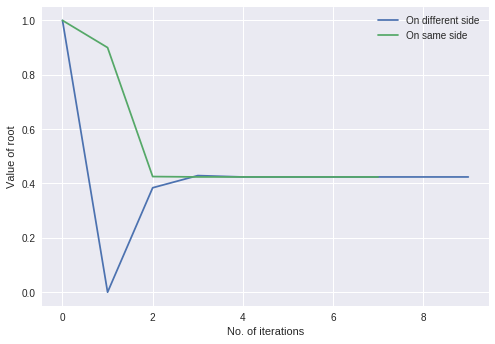

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,8.011687e-01,-,-,-,-
1,0.9,6.617169e-01,-0.1,-0.139452,0.425487,-0.474513
2,0.425487,1.926282e-03,-0.474513,-0.659791,0.424101,-0.00138536
3,0.424101,9.309773e-05,-0.00138536,-0.00183318,0.424031,-7.0355e-05
4,0.424031,2.556971e-08,-7.0355e-05,-9.30722e-05,0.424031,-1.93286e-08
5,0.424031,3.400613e-13,-1.93286e-08,-2.55694e-08,0.424031,-2.57072e-13
6,0.424031,0.000000e+00,-2.57072e-13,-3.40061e-13,0.424031,0


In [183]:
table , root , same = secant(1,0.9,4)
print(round(root,5))
graph(different,same,4)
table

In [184]:
table , root , different = secant(0,1,5)
print(round(root,5))
table

0.56714


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,0,-1.000000e+00,-,-,-,-
1,1,6.321206e-01,1,1.63212,0.6127,-0.3873
2,0.6127,7.081395e-02,-0.3873,-0.561307,0.563838,-0.0488614
3,0.563838,-5.182355e-03,-0.0488614,-0.0759963,0.56717,0.00333197
4,0.56717,4.241924e-05,0.00333197,0.00522477,0.567143,-2.70518e-05
5,0.567143,2.538017e-08,-2.70518e-05,-4.23939e-05,0.567143,-1.61953e-08
6,0.567143,-1.243450e-13,-1.61953e-08,-2.53803e-08,0.567143,7.93809e-14
7,0.567143,1.110223e-16,7.93809e-14,1.24456e-13,0.567143,-1.11022e-16
8,0.567143,-1.110223e-16,-1.11022e-16,-2.22045e-16,0.567143,1.11022e-16
9,0.567143,1.110223e-16,1.11022e-16,2.22045e-16,0.567143,0


0.56714


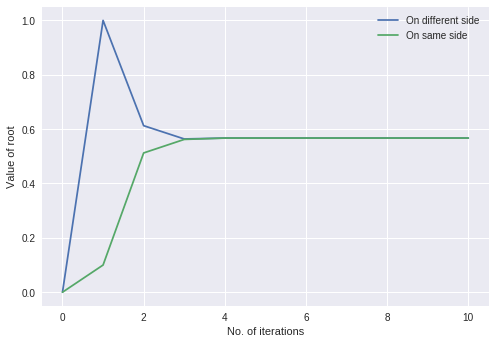

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,0,-1.000000e+00,-,-,-,-
1,0.1,-8.048374e-01,0.1,0.195163,0.512393,0.412393
2,0.512393,-8.666683e-02,0.412393,0.718171,0.56216,0.0497665
3,0.56216,-7.816932e-03,0.0497665,0.0788499,0.567093,0.00493369
4,0.567093,-7.807488e-05,0.00493369,0.00773886,0.567143,4.97745e-05
5,0.567143,-7.045794e-08,4.97745e-05,7.80044e-05,0.567143,4.49591e-08
6,0.567143,-6.351586e-13,4.49591e-08,7.04573e-08,0.567143,4.05342e-13
7,0.567143,1.110223e-16,4.05342e-13,6.3527e-13,0.567143,-1.11022e-16
8,0.567143,-1.110223e-16,-1.11022e-16,-2.22045e-16,0.567143,1.11022e-16
9,0.567143,1.110223e-16,1.11022e-16,2.22045e-16,0.567143,0


In [185]:
table , root , same = secant(0,0.1,5)
print(round(root,5))
graph(different,same,5)
table

In [186]:
table , root , different = secant(1,0.5,6)
print(round(root,5))
table

0.58853


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-4.735915e-01,-,-,-,-
1,0.5,1.271051e-01,-0.5,0.600697,0.605798,0.105798
2,0.605798,-2.377954e-02,0.105798,-0.150885,0.589124,-0.0166739
3,0.589124,-8.201329e-04,-0.0166739,0.0229594,0.588529,-0.000595607
4,0.588529,5.718546e-06,-0.000595607,0.000825851,0.588533,4.12424e-06
5,0.588533,-1.354285e-09,4.12424e-06,-5.7199e-06,0.588533,-9.76484e-10
6,0.588533,-2.220446e-15,-9.76484e-10,1.35428e-09,0.588533,-1.55431e-15
7,0.588533,-1.110223e-16,-1.55431e-15,2.10942e-15,0.588533,-1.11022e-16
8,0.588533,0.000000e+00,-1.11022e-16,1.11022e-16,0.588533,0


0.58853


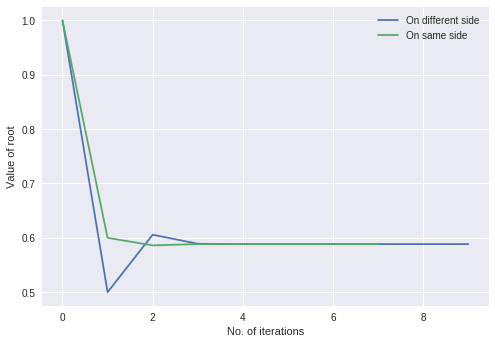

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,1,-4.735915e-01,-,-,-,-
1,0.6,-1.583084e-02,-0.4,0.457761,0.586167,-0.0138333
2,0.586167,3.284548e-03,-0.0138333,0.0191154,0.588544,0.00237694
3,0.588544,-1.512851e-05,0.00237694,-0.00329968,0.588533,-1.08979e-05
4,0.588533,-1.431144e-08,-1.08979e-05,1.51142e-05,0.588533,-1.03191e-08
5,0.588533,6.250556e-14,-1.03191e-08,1.43115e-08,0.588533,4.50751e-14
6,0.588533,0.000000e+00,4.50751e-14,-6.25056e-14,0.588533,0


In [187]:
table , root , same = secant(1,0.6,6)
print(round(root,5))
graph(different,same,6)
table

In [188]:
table , root , different = secant(2.5,4,6)
print(round(root,5))
table

3.09636


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-5.163871e-01,-,-,-,-
1,4.000000,7.751181e-01,1.5,1.29151,3.09975,-0.90025
2,3.099750,3.230336e-03,-0.90025,-0.771888,3.09598,-0.00376753
3,3.095983,-3.635020e-04,-0.00376753,-0.00359384,3.09636,0.00038107
4,3.096364,-5.767185e-08,0.00038107,0.000363444,3.09636,6.04687e-08
5,3.096364,1.043332e-12,6.04687e-08,5.76729e-08,3.09636,-1.09379e-12
6,3.096364,1.110223e-16,-1.09379e-12,-1.04322e-12,3.09636,0


3.09636


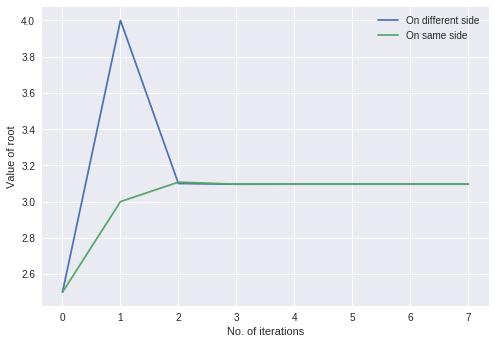

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-5.163871e-01,-,-,-,-
1,3.000000,-9.133294e-02,0.5,0.425054,3.10744,0.107437
2,3.107437,1.056622e-02,0.107437,0.101899,3.0963,-0.0111404
3,3.096296,-6.443359e-05,-0.0111404,-0.0106307,3.09636,6.75234e-05
4,3.096364,-3.237314e-08,6.75234e-05,6.44012e-05,3.09636,3.39426e-08
5,3.096364,1.038822e-13,3.39426e-08,3.23732e-08,3.09636,-1.08802e-13
6,3.096364,1.110223e-16,-1.08802e-13,-1.03771e-13,3.09636,0


In [189]:
table , root , same = secant(2.5,3,6)
print(round(root,5))
graph(different,same,6)
table

In [190]:
table , root , different = secant(2,1,7)
print(round(root,5))
table

1.76929


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,2,-,-,-,-
1,1,-3,-1,-5,1.6,0.6
2,1.6,-1.104,0.6,1.896,1.94937,0.349367
3,1.94937,1.50892,0.349367,2.61292,1.74761,-0.201754
4,1.74761,-0.157752,-0.201754,-1.66668,1.76671,0.0190962
5,1.76671,-0.0190577,0.0190962,0.138694,1.76933,0.00262397
6,1.76933,0.000301132,0.00262397,0.0193589,1.76929,-4.08165e-05
7,1.76929,-5.5937e-07,-4.08165e-05,-0.000301691,1.76929,7.56784e-08
8,1.76929,-1.63656e-11,7.56784e-08,5.59353e-07,1.76929,2.21423e-12
9,1.76929,0,2.21423e-12,1.63656e-11,1.76929,0


1.76929


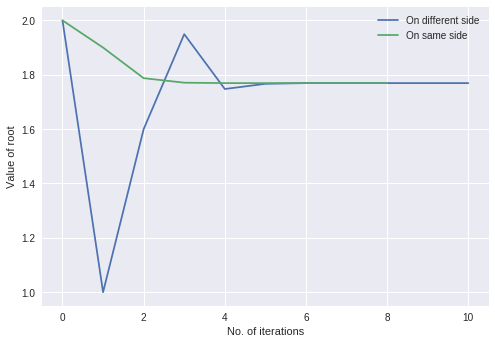

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,2,-,-,-,-
1,1.9,1.059,-0.1,-0.941,1.78746,-0.11254
2,1.78746,0.13604,-0.11254,-0.92296,1.77087,-0.0165878
3,1.77087,0.0116914,-0.0165878,-0.124348,1.76931,-0.00155961
4,1.76931,0.000150788,-0.00155961,-0.0115406,1.76929,-2.03776e-05
5,1.76929,1.70946e-07,-2.03776e-05,-0.000150617,1.76929,-2.3128e-08
6,1.76929,2.50466e-12,-2.3128e-08,-1.70944e-07,1.76929,-3.3884e-13
7,1.76929,0,-3.3884e-13,-2.50466e-12,1.76929,0


In [191]:
table , root , same = secant(2,1.9,7)
print(round(root,5))
graph(different,same,7)
table

In [192]:
table , root , different = secant(2,1,8)
print(round(root,5))
table

1.22074


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,13,-,-,-,-
1,1,-1,-1,-14,1.07143,0.0714286
2,1.07143,-0.753618,0.0714286,0.246382,1.28991,0.218482
3,1.28991,0.478548,0.218482,1.23217,1.20506,-0.0848537
4,1.20506,-0.0962846,-0.0848537,-0.574832,1.21927,0.014213
5,1.21927,-0.00923606,0.014213,0.0870485,1.22078,0.00150804
6,1.22078,0.000210003,0.00150804,0.00944606,1.22074,-3.35264e-05
7,1.22074,-4.41665e-07,-3.35264e-05,-0.000210445,1.22074,7.03626e-08
8,1.22074,-2.10487e-11,7.03626e-08,4.41644e-07,1.22074,3.35354e-12
9,1.22074,4.44089e-16,3.35354e-12,2.10492e-11,1.22074,0


1.22074


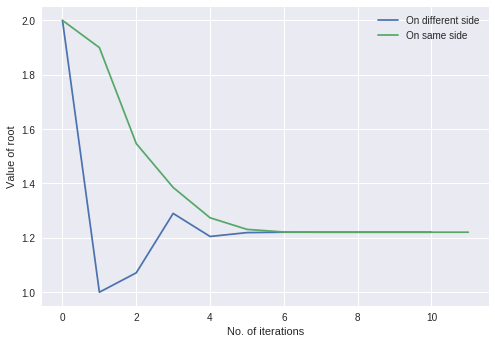

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,13,-,-,-,-
1,1.9,10.1321,-0.1,-2.8679,1.54671,-0.353293
2,1.54671,3.1764,-0.353293,-6.9557,1.38537,-0.161335
3,1.38537,1.29816,-0.161335,-1.87824,1.27386,-0.111509
4,1.27386,0.359377,-0.111509,-0.938786,1.23118,-0.0426867
5,1.23118,0.0664562,-0.0426867,-0.292921,1.22149,-0.00968451
6,1.22149,0.00469596,-0.00968451,-0.0617602,1.22076,-0.000736364
7,1.22076,6.90318e-05,-0.000736364,-0.00462693,1.22074,-1.09862e-05
8,1.22074,7.34436e-08,-1.09862e-05,-6.89583e-05,1.22074,-1.17008e-08
9,1.22074,1.15041e-12,-1.17008e-08,-7.34425e-08,1.22074,-1.83187e-13


In [193]:
table , root , same = secant(2,1.9,8)
print(round(root,5))
graph(different,same,8)
table

In [194]:
table , root , different = secant(-1,0,8)
print(round(root,5))
table

-0.72449


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,0,-1,1,-2,-0.5,-0.5
2,-0.5,-0.4375,-0.5,0.5625,-0.888889,-0.388889
3,-0.888889,0.513184,-0.388889,0.950684,-0.678965,0.209924
4,-0.678965,-0.108521,0.209924,-0.621705,-0.715608,-0.036643
5,-0.715608,-0.0221517,-0.036643,0.086369,-0.725006,-0.00939808
6,-0.725006,0.00129622,-0.00939808,0.0234479,-0.724486,0.000519533
7,-0.724486,-1.44153e-05,0.000519533,-0.00131063,-0.724492,-5.71421e-06
8,-0.724492,-9.25098e-09,-5.71421e-06,1.4406e-05,-0.724492,-3.66943e-09
9,-0.724492,6.61693e-14,-3.66943e-09,9.25105e-09,-0.724492,2.62013e-14


-0.72449


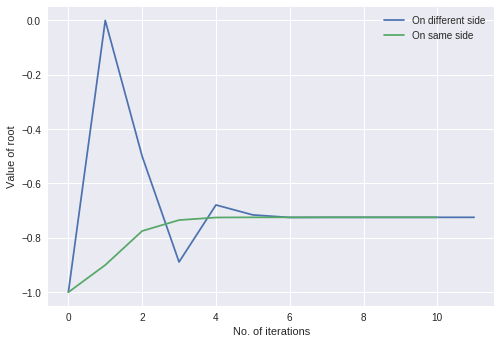

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,-1,1,-,-,-,-
1,-0.9,0.5561,0.1,-0.4439,-0.774724,0.125276
2,-0.774724,0.134961,0.125276,-0.421139,-0.734577,0.0401467
3,-0.734577,0.0257496,0.0401467,-0.109211,-0.725112,0.00946572
4,-0.725112,0.0015634,0.00946572,-0.0241862,-0.7245,0.000611865
5,-0.7245,1.96113e-05,0.000611865,-0.00154379,-0.724492,7.77272e-06
6,-0.724492,1.51768e-08,7.77272e-06,-1.95961e-05,-0.724492,6.01983e-09
7,-0.724492,1.47438e-13,6.01983e-09,-1.51766e-08,-0.724492,5.85088e-14
8,-0.724492,-2.22045e-16,5.85088e-14,-1.4766e-13,-0.724492,-1.11022e-16
9,-0.724492,0,-1.11022e-16,2.22045e-16,-0.724492,0


In [195]:
table , root , same = secant(-1,-0.9,8)
print(round(root,5))
graph(different,same,8)
table

In [196]:
table , root , different = secant(2,1,9)
print(round(root,5))
table

1.14619


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,3.389056e+00,-,-,-,-
1,1,-2.817182e-01,-1,-3.67077,1.07675,0.0767463
2,1.07675,-1.416324e-01,0.0767463,0.140086,1.15434,0.0775935
3,1.15434,1.758882e-02,0.0775935,0.159221,1.14577,-0.00857159
4,1.14577,-9.118716e-04,-0.00857159,-0.0185007,1.14619,0.000422481
5,1.14619,-5.429890e-06,0.000422481,0.000906442,1.14619,2.5308e-06
6,1.14619,1.691815e-09,2.5308e-06,5.43158e-06,1.14619,-7.88288e-10
7,1.14619,-2.886580e-15,-7.88288e-10,-1.69182e-09,1.14619,1.33227e-15
8,1.14619,0.000000e+00,1.33227e-15,2.88658e-15,1.14619,0


1.14619


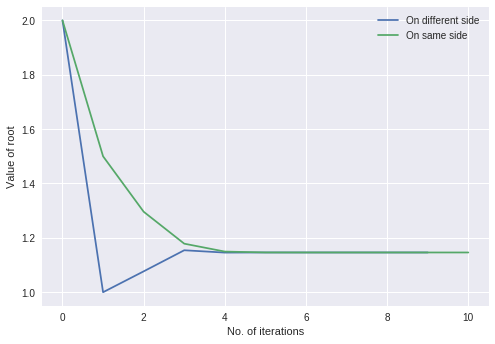

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2,3.389056e+00,-,-,-,-
1,1.5,9.816891e-01,-0.5,-2.40737,1.29611,-0.203893
2,1.29611,3.589337e-01,-0.203893,-0.622755,1.17859,-0.117516
3,1.17859,7.120087e-02,-0.117516,-0.287733,1.14951,-0.02908
4,1.14951,7.137805e-03,-0.02908,-0.0640631,1.14627,-0.00324005
5,1.14627,1.667138e-04,-0.00324005,-0.00697109,1.14619,-7.74858e-05
6,1.14619,4.048408e-07,-7.74858e-05,-0.000166309,1.14619,-1.88621e-07
7,1.14619,2.304823e-11,-1.88621e-07,-4.04818e-07,1.14619,-1.07392e-11
8,1.14619,-4.440892e-16,-1.07392e-11,-2.30487e-11,1.14619,2.22045e-16
9,1.14619,0.000000e+00,2.22045e-16,4.44089e-16,1.14619,0


In [197]:
table , root , same = secant(2,1.5,9)
print(round(root,5))
graph(different,same,9)
table

In [198]:
table , root , different = secant(2.5,1,10)
print(round(root,5))
table

1.93456


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-9.015279e-01,-,-,-,-
1,1.000000,8.414710e-01,-1.5,1.743,1.72416,0.724158
2,1.724158,2.641052e-01,0.724158,-0.577366,2.05541,0.331253
3,2.055410,-1.705557e-01,0.331253,-0.434661,1.92543,-0.129979
4,1.925431,1.234245e-02,-0.129979,0.182898,1.9342,0.00877136
5,1.934202,4.892196e-04,0.00877136,-0.0118532,1.93456,0.000362021
6,1.934564,-1.546906e-06,0.000362021,-0.000490766,1.93456,-1.1411e-06
7,1.934563,1.924352e-10,-1.1411e-06,1.5471e-06,1.93456,1.41935e-10
8,1.934563,-1.110223e-16,1.41935e-10,-1.92435e-10,1.93456,0


1.93456


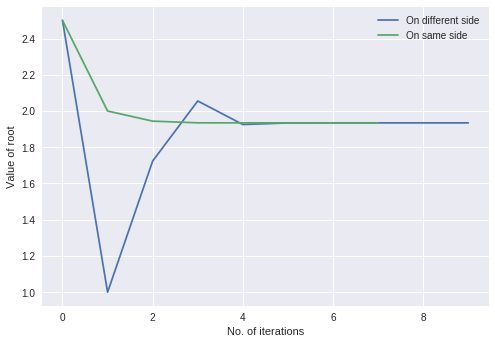

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,2.500000,-9.015279e-01,-,-,-,-
1,2.000000,-9.070257e-02,-0.5,0.810825,1.94407,-0.0559323
2,1.944068,-1.292838e-02,-0.0559323,0.0777742,1.93477,-0.0092976
3,1.934770,-2.805772e-04,-0.0092976,0.0126478,1.93456,-0.000206257
4,1.934564,-9.148460e-07,-0.000206257,0.000279662,1.93456,-6.74718e-07
5,1.934563,-6.524037e-11,-6.74718e-07,9.14781e-07,1.93456,-4.81195e-11
6,1.934563,-1.110223e-16,-4.81195e-11,6.52403e-11,1.93456,0


In [199]:
table , root , same = secant(2.5,2,10)
print(round(root,5))
graph(different,same,10)
table

In [19]:
table , root , different = secant(4.6,4.2,11)
print(round(root,5))
table

4.49341


,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,4.600000,-4.260175e+00,-,-,-,-
1,4.200000,2.422220e+00,-0.4,6.6824,4.34499,0.144991
2,4.344991,1.746728e+00,0.144991,-0.675492,4.71992,0.374927
3,4.719918,1.375336e+02,0.374927,135.787,4.34017,-0.37975
4,4.340168,1.778826e+00,-0.37975,-135.755,4.33519,-0.00497595
5,4.335192,1.810997e+00,-0.00497595,0.0321715,4.6153,0.280106
6,4.615299,-5.652005e+00,0.280106,-7.463,4.40316,-0.212135
7,4.403164,1.273013e+00,-0.212135,6.92502,4.44216,0.0389963
8,4.442160,8.321108e-01,0.0389963,-0.440902,4.51576,0.0735975
9,4.515758,-5.041880e-01,0.0735975,-1.3363,4.48799,-0.0277685


4.49341


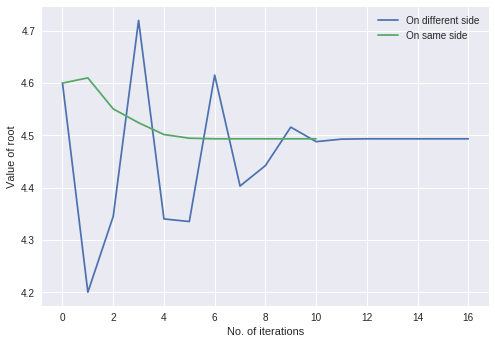

,x(n),f(x(n)),x(n)-x(n-1),f(x(n))-f(x(n-1)),x(n+1),x(n+1)-x(n)
0,4.600000,-4.260175e+00,-,-,-,-
1,4.610000,-5.122522e+00,0.01,-0.862348,4.5506,-0.0594021
2,4.550598,-1.576189e+00,-0.0594021,3.54633,4.5242,-0.0264016
3,4.524196,-7.266280e-01,-0.0264016,0.849561,4.50162,-0.0225812
4,4.501615,-1.723387e-01,-0.0225812,0.554289,4.49459,-0.00702092
5,4.494594,-2.405461e-02,-0.00702092,0.148284,4.49346,-0.00113893
6,4.493455,-9.245690e-04,-0.00113893,0.02313,4.49341,-4.55261e-05
7,4.493410,-5.163572e-06,-4.55261e-05,0.000919405,4.49341,-2.55684e-07
8,4.493409,-1.114840e-09,-2.55684e-07,5.16246e-06,4.49341,-5.52154e-11
9,4.493409,-8.881784e-16,-5.52154e-11,1.11484e-09,4.49341,0


In [20]:

table , root , same = secant(4.6,4.61,11)
print(round(root,5))
graph(different,same,11)
table